## Day 04

In [1]:
import pandas as pd 
import numpy as np

In [2]:
climate_df=pd.read_csv('mumbai_climate.csv')
climate_df

,Date,Rain,Temp Max,Temp Min
0,01-01-1951,NaN,28.53000069,14.53999996
1,02-01-1951,NaN,28.85000038,14.47999954
2,03-01-1951,NaN,30.65999985,14.43000031
3,04-01-1951,NaN,30.13999939,14.35999966
4,05-01-1951,NaN,29.18000031,13.34000015
...,...,...,...,...
26801,18-06-2024,Tr,34.3,26.6
26802,19-06-2024,20,34.8,25.5
26803,45463,18,33.1,25.4
26804,45464,4,30.9,26.7


In [3]:
climate_df.duplicated().sum()

np.int64(0)

**No duplicates found in the dataset**

In [4]:
climate_df.describe()

,Date,Rain,Temp Max,Temp Min
count,26806,1238,26806,26805
unique,26806,104,3993,4315
top,01-01-1951,0,-----,25
freq,1,788,58,82


In [5]:
climate_df[['Temp Max', 'Temp Min']].min(), 
climate_df[['Temp Max', 'Temp Min']].max()

TypeError: '<=' not supported between instances of 'str' and 'float'

In [6]:
climate_df[['Temp Max', 'Temp Min']].dtypes

Temp Max    object
Temp Min    object
dtype: object

In [7]:
climate_df['Temp Max'] = pd.to_numeric(climate_df['Temp Max'], errors='coerce')
climate_df['Temp Min'] = pd.to_numeric(climate_df['Temp Min'], errors='coerce')
# valid numbers are kept
# strings are converted to NaN

In [8]:
climate_df[['Temp Max', 'Temp Min']].min()
climate_df[['Temp Max', 'Temp Min']].max()

Temp Max    40.9
Temp Min    30.0
dtype: float64

In [9]:
climate_df[['Temp Max', 'Temp Min']].isna().sum()

Temp Max    58
Temp Min    60
dtype: int64

In [10]:
# Temperature columns contained mixed data types (numeric and string values). 
# Converted them to numeric using coercion, resulting in NaNs where invalid entries existed.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

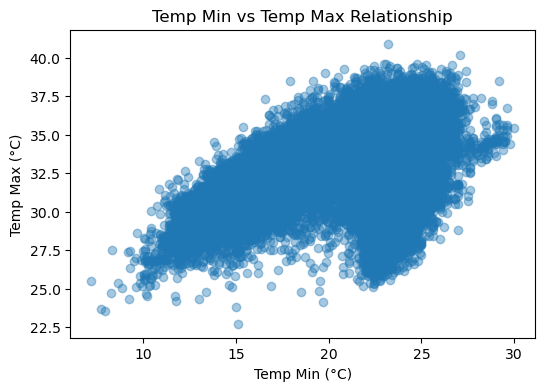

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(climate_df['Temp Min'], climate_df['Temp Max'], alpha=0.4)
plt.xlabel('Temp Min (°C)')
plt.ylabel('Temp Max (°C)')
plt.title('Temp Min vs Temp Max Relationship')
plt.show()

In [13]:
# strong positive correlation
# few scattered edge points
# outliers exist but don't break pattern

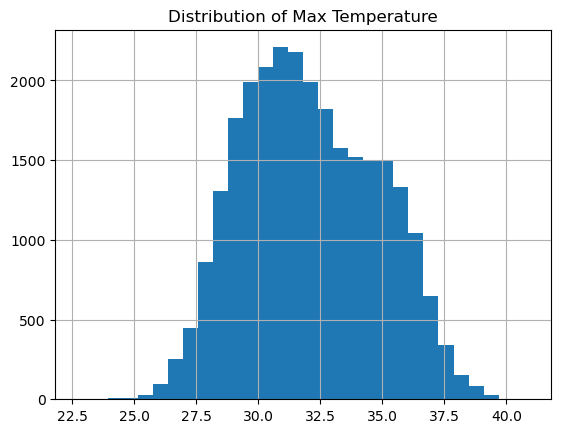

In [14]:
climate_df['Temp Max'].hist(bins=30)
plt.title('Distribution of Max Temperature')
plt.show()

In [15]:
# bell shaped curve
# peak around 30-33 c
# distribution is mostly normal, slightly right skewed
# no dangerous outliers

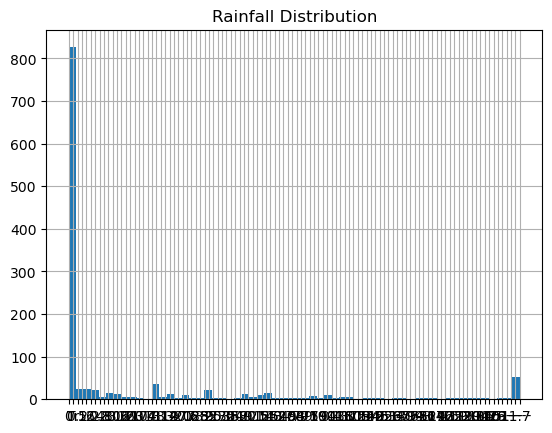

In [16]:
climate_df['Rain'].hist(bins=60)
plt.title('Rainfall Distribution')
plt.show()

In [17]:
# histogram has many unique values
# and matplotlib tries to show every tick
# that why there is chaos at the bottom

TypeError: 'value' must be an instance of str or bytes, not a float

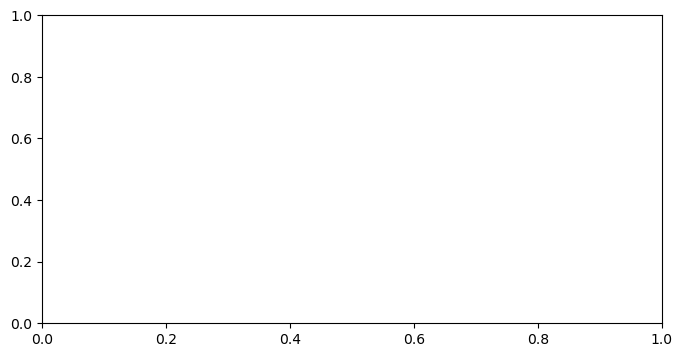

In [18]:
plt.figure(figsize=(8,4))
plt.hist(climate_df['Rain'], bins=40)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [19]:
climate_df['Rain'].dtype

dtype('O')

In [20]:
climate_df['Rain'] = climate_df['Rain'].replace(['Tr', '-----', ' '], np.nan)
climate_df['Rain'] = pd.to_numeric(climate_df['Rain'], errors='coerce')
climate_df['Rain'] = climate_df['Rain'].fillna(0)

# removes non-numeric data
# forces numeric dtype
# ensures histogram-safe input

In [21]:
climate_df['Rain'].dtype

dtype('float64')

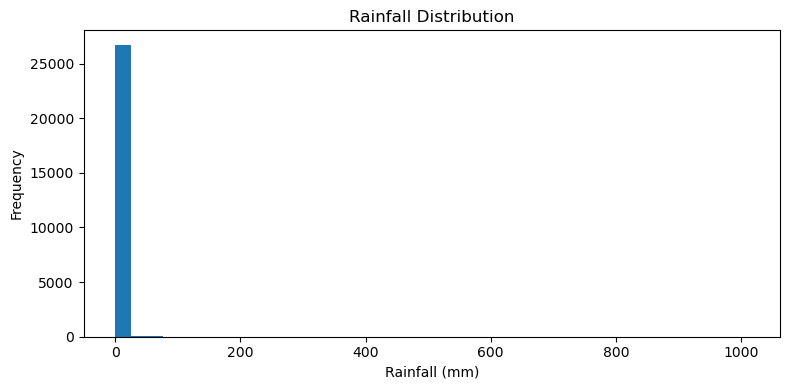

In [22]:
plt.figure(figsize=(8,4))
plt.hist(climate_df['Rain'], bins=40)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- The rainfall distribution is highly right-skewed, with most observations clustered near zero.

- A large number of days record no rainfall or very light rainfall, which explains the high 
 frequency near 0 mm.

- A small number of days show extremely high rainfall values, creating a long tail.

- These extreme values likely correspond to monsoon events rather than data errors.

- This pattern is consistent with Mumbai’s coastal monsoon climate, where rainfall is seasonal and concentrated.

In [24]:
(climate_df['Rain'] == 0).mean()

np.float64(0.9866447810191749)

## Conclusion:

- Rainfall skewness & outliers

- Temperature stability

- Strong temp correlation

- Monsoon pattern insight

- Decision to keep outliers